# CSCI 3360 : Handwritten Digit Data Clustering
In this assignment, we are going to apply $k$-means clustering method to the handwritten digit dataset, called **MNIST**, to group similar images of digits together. The mnist dataset contains $28\times 28$ pixel images of handwritten digits 0 through 9. The training set and test set contain 60,000 and 10,000 examples, respectively.

## Submission instruction
- Due by 11:59pm on **April 28th, 2018**
- Complete this notebook and submit it by the due date
- Do not use any 3rd party libraries unless you are asked to do so.
- Feel free to define your own functions if needed.


## Task 0: load the mnist dataset
First, you can download the dataset from [here](http://yann.lecun.com/exdb/mnist/). Visit the website and download the four files:
- train-images-idx3-ubyte
- train-labels-idx1-ubyte
- t10k-images-idx3-ubyte
- t10k-labels-idx1-ubyte

You can use the following code to load the MNIST data. It is assumed that you downloaded (or copied) all the files to the same directory where this ipython notebook file is located. Probably, it is going to take longer than the files you tried in the past assignment.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import struct
import os
import math

In [2]:
def load_data(dataset="train", path="../Desktop/python/hw5"):
    """
    Parameters:
    ------------
      - dataset: a string either 'train' or 'test'
      - path: path to the directory where data files exist
      
    Returns:
      - X, y: paired (features, labels) dataset
    """
    if dataset == "train":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset == "test":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be either 'test' or 'train'")
    
    # load features
    fimg = open(fname_img, 'rb')
    magic,size = struct.unpack('>ii', fimg.read(8))
    sx,sy = struct.unpack('>ii', fimg.read(8))
    img = []
    for i in range(size):
        im =  struct.unpack('B'*(sx*sy), fimg.read(sx*sy))
        img.append([float(x)/255.0 for x in im])
    
    fimg.close()
    X = np.array(img)
    
    # load labels
    flbl = open(fname_lbl, 'rb')
    magic,size = struct.unpack('>ii', flbl.read(8))
    lbl = struct.unpack('B'*size, flbl.read(size))
    
    flbl.close()
    y = np.array(lbl)
    
    return X, y

In [3]:
# load the dataset
X_train, y_train = load_data("train")
X_test, y_test = load_data("test")

print "training set of size ", X_train.shape
print "test set of size ", X_test.shape

training set of size  (60000, 784)
test set of size  (10000, 784)


After loading the dataset, you can use the following code to display some examples in the data.

In [4]:
def plot_digit(digit, label):
    """ 
    Display an image of digit
    Parameters
    ------------------
     - digit: numpy array of length 28 x 28 = 784
     - label: an integer corresponding to the label
    """
    
    image = digit.reshape(28, 28)
    
    plt.imshow(image, cmap='gray_r', interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    
    plt.title("Label: " + str(label))

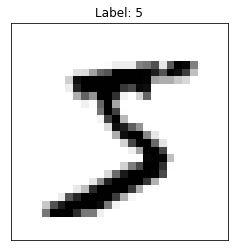

In [5]:
# display the first image in the training set
plot_digit(X_train[0], y_train[0])

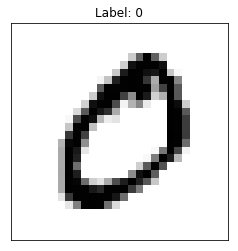

In [6]:
plot_digit(X_train[1], y_train[1])

## Task 1: implement k-means algorithm (60 pts)
Now, we are ready to implement our k-means algorithm. Please recall that k-means consists of two steps. At each iteration, the algorithm
- assigns the data points to its nearest cluster centroid and then
- updates cluster centroids based on the new assignment.

We can measure the goodness of the given clustering by computing **within-cluster-sum-of-squares (WCSS)**, which is defined as:
$$
\text{WCSS}(C) = \sum_{i=1}^K \sum_{x \in C_i} \| x - \mu_i\|^2\,,
$$
where $\mu_i$ is the center of $i^{\text{th}}$ cluster $C_i$.

Implement the $k$-means algorithm using the following template. Feel free to add more member functions if you need.

In [7]:
from random import *
class MyKMeans:
    def __init__(self, k):  # This is an the starting point for the algorithm 
        """
        Parameters:
          - k: number of partitions (or clusters) # How many cluster we want to generate into our dataset.
          __init__ is a special method in Python classes, it is the constructor method for a class. 
          It is equivalent to the constructor in the java
        """
        self.K = k
        self.centers = None
        self.record_y = None
        # right
        
    def initialize_centers(self, k, dim):
        """ 
        initialize the k-centeroids (self.centers) with randomly chosen points # The k- centeroids is randomly set up by the users.
        Parameters:
         - k : number of clusters
         - dim: dimensionality of each centroid
        """

        self.centers = np.random.rand(k,dim) # In here, we have created a list.
        pass  # It is useful as a placeholder when a statement is required syntactically, but no code needs to be executed
        # right, right
        
    def assign_points(self, X):
        """ 
        This function assigns data points to their nearest centroids.
        
        Parameters:
         - X: 2D array of examples, each row is an example.
        
        returns:
         - assignment: a list of cluster assignment. Each element in this list corresponds to 
                  the index of cluster to which the given data point is assigned.
                  For example, labels=[0, 1, 1, ...] means that the first example in X was
                  assigned to the first cluster, the second example to the 2nd cluster, and 
                  so on.
        """
        assignment = []
        for i in range(len(X_train)):
            nearest = []
            for x in range(len(self.centers)):  
                dist = np.linalg.norm(X_train[i] - self.centers[x])
                nearest.append(dist) 
            index = np.argmin(nearest) # quickly returning the index of min value in a list 
            assignment.append(index) # append the points to the centroids
        return assignment
        # Now, I got a list 
        pass
    
    def update_mean(self, X, assignment):
        """ 
        Given the current cluster assignment, this function recomputes the mean (the centroid) of 
        each cluster.
        Parameters:
         - X: 2D array of examples
        - assignment: cluster assignment for all examples  
         """   
        mean_list = []
        for z in range(len(self.centers)):
            num = 0
            sum_ = 0 
            for n in range(len(assignment)):
                if z == assignment[n]:
                    sum_ += X[n]
                    num += 1
            print num
            if num != 0:
                mean = sum_ / num               
            mean_list.append(mean)
        self.centers = mean_list
            # the mean_list includes all the new_mean
            # right
        pass
    
    # Taking 1 - 2hours 
    def compute_WCSS(self, X):  
        """
        compute the within-cluster-sum-of-squares
        
        Parameters:
         - X: 2D array of examples
         
        Retrurn:
         - wcss: a real number
        """
        # trying to improve efficiency
        sum_ = 0
        wcss = []
        for x in range(len(self.centers)):
            for n in range(len(X)):
                number = np.linalg.norm(X[n] - self.centers[x]) ** 2
                sum_ += number 
            wcss.append(sum_)
        #for the final result, I need to sum up the array
        wcss = sum(wcss)
        return wcss # I think this function is right
        
        pass
    
    def fit(self, X, max_iter=3):
        """ 
        trains the k-means model using the given dataset. This function will call assign_points()
        and update_mean() functions in a loop
        
        Parameters
        ------------
        - X: 2D numpy array, each row represents an example
        - max_iter: an integer, maximum number of iterations to run
                
        """
        for x in range(max_iter):
            self.update_mean(X, self.assign_points(X) ) # then we calculate the mean the centroids went back to original. 
        # The purpose of this function is to stablelized the cluster
        # It seems like I got it right      
        pass


In [8]:
# test again
# let's focus on this fucking assgin_points part
# First Part:
k = 15
km = MyKMeans(k) # This will run the kmean class by passing a value k=15
# Get the dimensionality 
dim = X_train[0].shape
dim = dim[0]
km.initialize_centers(k,dim)

In [9]:
print km.centers

[[ 0.44905697  0.11369515  0.92945732 ...,  0.38320004  0.37771952
   0.55749499]
 [ 0.9596716   0.30771983  0.25115229 ...,  0.46233077  0.32420781
   0.44801202]
 [ 0.33789257  0.939559    0.90846584 ...,  0.76694364  0.67566527
   0.79235241]
 ..., 
 [ 0.48405878  0.22130797  0.84987682 ...,  0.36679369  0.70906244
   0.49506458]
 [ 0.64528667  0.77616962  0.17007114 ...,  0.79563998  0.89132016
   0.05782243]
 [ 0.73829721  0.41788956  0.00268957 ...,  0.95630067  0.05298705
   0.54014501]]


In [10]:
a = km.assign_points(X_train)
print a

[2, 2, 7, 2, 5, 1, 7, 2, 7, 1, 1, 1, 7, 7, 7, 1, 1, 2, 7, 2, 8, 2, 2, 2, 5, 14, 1, 2, 1, 1, 7, 1, 7, 1, 2, 1, 7, 2, 1, 7, 7, 2, 5, 2, 2, 1, 1, 2, 7, 2, 7, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 7, 2, 7, 10, 7, 5, 10, 10, 7, 5, 7, 7, 2, 7, 2, 2, 2, 5, 7, 2, 10, 7, 1, 2, 7, 1, 1, 2, 7, 5, 1, 7, 2, 2, 1, 2, 2, 2, 2, 2, 7, 1, 7, 2, 7, 2, 2, 1, 1, 2, 7, 14, 2, 2, 1, 2, 7, 2, 2, 2, 14, 1, 7, 2, 7, 1, 7, 2, 2, 2, 7, 1, 7, 2, 7, 2, 7, 1, 1, 5, 1, 1, 1, 2, 1, 7, 2, 2, 7, 7, 8, 2, 1, 7, 2, 2, 8, 1, 7, 2, 1, 2, 1, 7, 1, 1, 1, 2, 1, 1, 5, 1, 7, 2, 5, 2, 2, 2, 2, 2, 7, 1, 7, 2, 7, 7, 1, 1, 1, 2, 7, 2, 1, 2, 1, 1, 7, 1, 7, 14, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 7, 1, 1, 2, 7, 7, 7, 2, 7, 7, 1, 1, 2, 7, 1, 1, 7, 1, 1, 8, 7, 1, 2, 1, 2, 1, 7, 2, 1, 1, 7, 1, 2, 2, 2, 1, 7, 10, 7, 2, 1, 1, 7, 2, 2, 1, 1, 2, 2, 7, 7, 1, 1, 1, 7, 1, 1, 2, 7, 1, 1, 2, 2, 1, 8, 1, 7, 1, 1, 2, 8, 2, 7, 2, 7, 1, 1, 1, 8, 2, 7, 2, 1, 2, 2, 7, 7, 1, 2, 1, 7, 2, 1, 1, 1, 1, 1, 2, 7, 7, 7, 2, 7, 14, 7, 1, 2, 1, 2, 1, 1, 1, 1, 1, 7, 2, 2, 1,

In [12]:
km.update_mean(X_train, km.assign_points(X_train) )

0


ZeroDivisionError: integer division or modulo by zero

In [30]:
print len(km.centers)

5


In [11]:
km.fit(X_train, 20)

0


ZeroDivisionError: integer division or modulo by zero

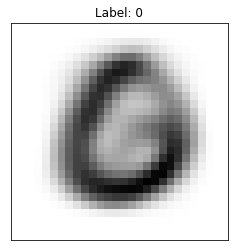

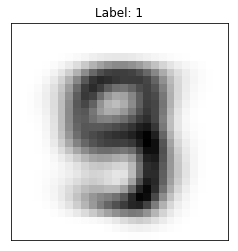

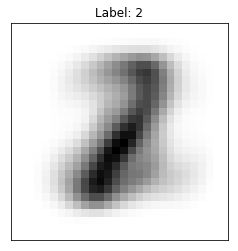

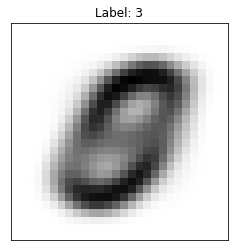

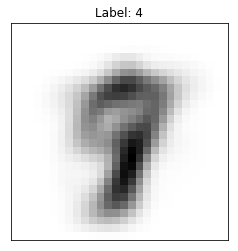

In [37]:
for digit in range(len(km.centers)):  
    plt.figure()
    plot_digit(km.centers[digit], digit)
    

Using the k-means algorithm you implemented above, we can cluster images of digits into $k$-groups. Obviously, we have 10 clusters (or classes), but we are going to set $k$ greater than 10 (for example, let's say $k=15$). (why?)

## Task 2: Run k-means and Visualize the centroids (20 pts)
Run the k-means algorithm 10 times (with different intializations) and choose the one with the smallest WCSS. Visualize the $k$-centroids. Note that the centroid is average of images in that cluser, which is still a image but it will be blurry due to the averaging.

In [4]:
k = 15

km = MyKmeans(k)

# run k-means 10 times and choose the one that gives you the best results, i.e.,
# one with the smallest WCSS

#------------------------------#
#  Your code goes here         #
#------------------------------#



NameError: name 'MyKmeans' is not defined

## Task 3: Classification (20 pts)

After running the k-means, you get the clustering results consisting of $k$-centroid and indices of data points belonging to each cluster. Determine its label as the majority of labels in the cluster. Once we determine the labels for $k$-centroids, we can use this to classify data points.

For each example $(x_i, y_i)$ in the test set **X_test**, 
1. find the nearest centroid of $x_i$
2. predict the label of $x_i$, $y_i'$ as that of its nearest centroid
3. compute the accuracy by counting the number of examples with $y_i = y_i'$

For this task, implement the following function.

In [1]:
def assign_label(centers, y, assignment):
    """
    determines the label of each cluster by looking at the labels of its members
    
    Parameters:
     - centers: k-centroids
     - y: true label in the dataset
     - assignment: a list (or array) representing the assignments of data points to clusters
    
    Returns:
     - labels: an array of length $k$, labels for clusters
    """
    x_index = {c: [] for c in range(len(centers))}
    for num in range(len(centers)):
        for o in range(len(assignment)):
            b = assignment[o]     
            if b == num:
                x_index[num].append(y[o]) 
                
    y_label =[]
    for a in range(len(x_index)):
        counts = np.bincount(x_index[a])
        y_label.append(np.argmax(counts))
        
    labels = y_label
    return labels
            
    pass

# Promised to be right!!

**Report the best accuracy you obtained.**

**Visualize the followings for $i=5, 10, 15$:**
1. test image, i.e., $x_i$ (for this use the plot_digit() function)
2. its nearest centroid
3. its true label $y_i$
4. its predicted label $y_i'$

## Task 4:Plots to draw (30 pts)

1. Intialize your centroids randomly. Once you generate inital centroids, fix this initial points and use it throughout all the experiments.
2. Set $k=15$, and draw a plot that shows how the objective value of $k$-means, WCSS, changes with iterations.
3. For $k = [5, 10, 15, 20, 25]$, train the $k$-means model using the examples in the training set and compute its accuracy on the test set. Draw a plot showing how the classification accuracy of $k$-means changes as you change the value of $k$. The $x$-axis and $y$-axis corresponds to $k$ and accuracy, respectively.
